In [2]:
import cv2
import pandas as pd
import time
import deepface
from deepface import DeepFace
import mediapipe
# import dlib

In [3]:
df=pd.read_csv('emotion.csv')

In [5]:
# face_cascade = cv2.CascadeClassifier(r'C:\Users\karnb\Documents\haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture("demos1.mp4")

width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer= cv2.VideoWriter('demos4_result.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))

# df.drop('Unnamed: 0',axis=1,inplace=True)
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]


prev_frame_time = 0
  
# used to record the time at which we processed current frame
new_frame_time = 0

start_time = time.time()
while(cap.isOpened()):

    ret,frame = cap.read()
    
#     gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray,1.2,5)

#     for (x,y,w,h) in faces:
#         rec=cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
#         cv2.imshow('frame',rec)
       
#     start_time = time.time()
    emotion=' '
#     seconds = 0
    current_time = time.ctime()
    c_time = time.time()
    elapsed_time = c_time - start_time
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    font = cv2.FONT_HERSHEY_SIMPLEX
#     if int(elapsed_time)>=seconds:
    result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False,detector_backend=backends[4] )
#         emotion = result[0]['dominant_emotion']
#         exp=result[0]['dominant_emotion']
    time1=current_time.split(' ')[-2]
#     df1 = pd.DataFrame({"Emotion":emotion, "Time elapsed": time1}, index=[1])
#     df = df.append(df1)
    start_time = time.time()


    for dicts in result:
        x, y, w, h = dicts['region']['x'], dicts['region']['y'], dicts['region']['w'], dicts['region']['h']
        emotion = dicts['dominant_emotion']
        txt = str(emotion)
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
#             cv2.imshow('frame',rec)
        cv2.putText(frame,txt,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
#         cv2.putText(frame, fps, (7, 70), font, 1, (100, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow('frame',frame)
        writer.write(frame)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
writer.release()
cv2.destroyAllWindows()

        

In [32]:
result

[{'emotion': {'angry': 68.90179289558019,
   'disgust': 0.0004970745384047824,
   'fear': 8.170173088291515,
   'happy': 1.788942302591526,
   'sad': 20.962878052845234,
   'surprise': 0.009363128968066995,
   'neutral': 0.16634557741486103},
  'dominant_emotion': 'angry',
  'region': {'x': 476, 'y': 126, 'w': 52, 'h': 63}},
 {'emotion': {'angry': 0.014784224913455546,
   'disgust': 4.2186938387089867e-07,
   'fear': 2.396034821867943,
   'happy': 0.0013239866348158102,
   'sad': 96.42663598060608,
   'surprise': 4.4597783244171296e-05,
   'neutral': 1.161179319024086},
  'dominant_emotion': 'sad',
  'region': {'x': 123, 'y': 31, 'w': 41, 'h': 59}}]

In [11]:
result

[{'emotion': {'angry': 0.00022464570494992668,
   'disgust': 0.00210601732580467,
   'fear': 0.000159060833015438,
   'happy': 97.22332937856491,
   'sad': 0.14238404958749112,
   'surprise': 7.038042124487564e-07,
   'neutral': 2.6317977983831047},
  'dominant_emotion': 'happy',
  'region': {'x': 0, 'y': 0, 'w': 596, 'h': 336}}]

In [4]:
cap.release()
cv2.destroyAllWindows()

In [32]:
type(frame)

numpy.ndarray

In [7]:
frame.shape

(336, 596, 3)

In [8]:
len(result)

1

In [33]:
result

[{'emotion': {'angry': 1.1033971958340771e-06,
   'disgust': 4.341790260653511e-08,
   'fear': 0.010576008935458958,
   'happy': 4.0045928210020065,
   'sad': 0.05177663406357169,
   'surprise': 2.6499871186302926e-07,
   'neutral': 95.93305587768555},
  'dominant_emotion': 'neutral',
  'region': {'x': 0, 'y': 0, 'w': 596, 'h': 336}}]

In [10]:
for emo in result:
    print(result[0]['dominant_emotion'])

neutral


In [34]:
df

,Emotion,Time elapsed
1,neutral,16:53:16
1,neutral,16:53:16
1,neutral,16:53:17
1,neutral,16:53:17
1,neutral,16:53:17
...,...,...
1,happy,16:53:54
1,happy,16:53:55
1,neutral,16:53:55
1,neutral,16:53:55


In [36]:
current_time

'Tue Mar 21 13:14:37 2023'

In [34]:
type(start_time)

float

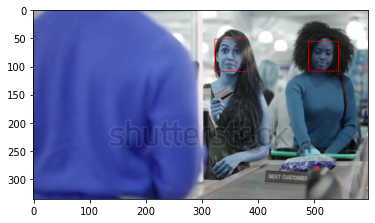

In [12]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [13]:
cv2.imwrite('abcd.jpg', frame)

True

In [21]:
ab = cv2.imread('abcd.jpg')
res = DeepFace.analyze(img_path = ab , actions=['emotion'], enforce_detection=False,detector_backend=backends[3])

1/1 [==============================] - 0s 284ms/step


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]
